#Task 1: Customer Churn
The customer churn dataset dataset captures customer interactions with an online retail store. This document describes the data fields.

For this dataset, build two classifiers to predict Churn:
1. one using Adaboost and
2. one using random forest.

Use a suitable evaluation metric to compare the performance of the classifiers.



In [678]:
# Data processing
import numpy as np
import pandas as pd

# Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint

In [679]:
df = pd.read_csv("/content/customer-churn-data.csv")

In [680]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


### Preprocessing

In [681]:
df['Gender'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [682]:
df['Gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)

In [683]:
df['EmailOptIn'].unique()

array([ True, False])

In [684]:
df['EmailOptIn'].replace([True, False],[0,1], inplace=True)

In [685]:
df['PromotionResponse'].unique()

array(['Responded', 'Ignored', 'Unsubscribed'], dtype=object)

In [686]:
df['PromotionResponse'].replace(['Responded', 'Ignored', 'Unsubscribed'],[0,1,2], inplace=True)

In [687]:
df['Churn'].unique()

array([ True, False])

In [688]:
df['Churn'].replace([True, False],[0,1],inplace=True)

In [689]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,0,0,0
1,2,65,0,79.51,9025.47,13,77,22.90,2,2,3,227,1,0,1
2,3,18,0,29.19,618.83,13,71,50.53,5,2,2,283,1,0,0
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,0,1,0
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,1,2,1


## Random Forest (testing)

In [690]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X, y

(     CustomerID  Age  Gender  AnnualIncome  TotalSpend  YearsAsCustomer  \
 0             1   62       2         45.15     5892.58                5   
 1             2   65       0         79.51     9025.47               13   
 2             3   18       0         29.19      618.83               13   
 3             4   21       2         79.63     9110.30                3   
 4             5   21       2         77.66     5390.88               15   
 ..          ...  ...     ...           ...         ...              ...   
 995         996   54       0        143.72     1089.09                2   
 996         997   19       0        164.19     3700.24                9   
 997         998   47       1        113.31      705.85               17   
 998         999   23       0         72.98     3891.60                7   
 999        1000   34       2        134.86     3956.71               15   
 
      NumOfPurchases  AvgTransactionAmount  NumOfReturns  NumOfSupportQueries  \
 0   

In [691]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.6, random_state=32, shuffle=True)

In [692]:
len(X_test), len(X_train)

(400, 600)

In [693]:
rf = RandomForestClassifier(random_state=32)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=32)

In [694]:
Y_pred = rf.predict(X_test)

In [695]:
accuracy = accuracy_score(Y_test, Y_pred)

In [696]:
print(accuracy)

0.4675


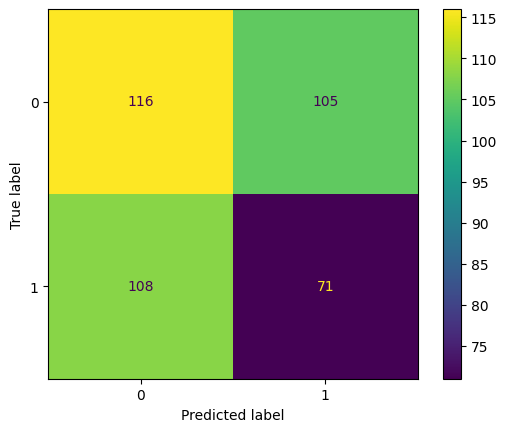

In [697]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [698]:
l = ['precision', 'recall', 'fscore']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred)]
for i in range(3):
  print(l[i], '=', scores[i])

precision = 0.4034090909090909
recall = 0.39664804469273746
fscore = 0.4


## Random Forest with Hyperparameter Tuning

In [699]:
param_dist = {'n_estimators': randint(50,300),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=20,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e49287aca00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e492884aec0>})

In [700]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 155}


In [701]:
# Generate predictions with the best model
Y_pred = best_rf.predict(X_test)

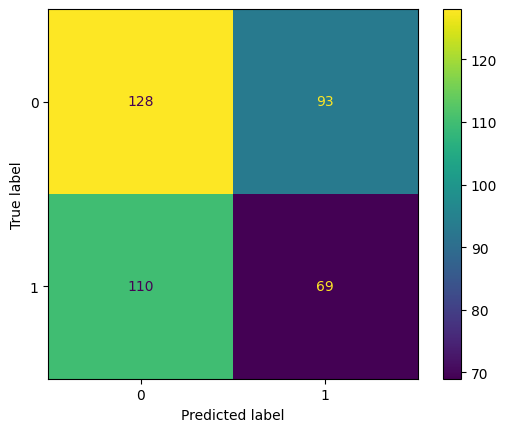

In [702]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [703]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.42592592592592593
recall = 0.3854748603351955
fscore = 0.4046920821114369
accuracy-score = 0.485


In [704]:
corr = df.corr() #Correlation Matrix
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-704-eb96cffa9096>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
CustomerID,1.00,0.01,0.02,-0.02,-0.02,-0.02,0.02,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.00,-0.04
Age,0.01,1.00,-0.09,0.04,-0.03,-0.02,0.03,0.01,0.00,-0.02,0.02,0.01,-0.00,-0.02,0.01
Gender,0.02,-0.09,1.00,-0.07,0.02,0.02,-0.04,0.02,-0.03,-0.01,-0.05,-0.00,-0.02,0.05,-0.04
AnnualIncome,-0.02,0.04,-0.07,1.00,0.02,-0.03,0.03,0.01,0.04,0.02,0.02,0.04,-0.01,0.01,0.04
TotalSpend,-0.02,-0.03,0.02,0.02,1.00,0.04,0.05,-0.09,0.01,-0.04,-0.00,-0.04,-0.03,0.01,-0.03
YearsAsCustomer,-0.02,-0.02,0.02,-0.03,0.04,1.00,0.02,-0.02,0.04,-0.01,-0.03,-0.01,0.04,0.04,0.03
NumOfPurchases,0.02,0.03,-0.04,0.03,0.05,0.02,1.00,-0.02,-0.00,0.01,0.01,-0.04,-0.01,0.05,0.03
AvgTransactionAmount,-0.01,0.01,0.02,0.01,-0.09,-0.02,-0.02,1.00,0.01,0.04,0.02,0.03,0.03,0.05,0.02
NumOfReturns,0.00,0.00,-0.03,0.04,0.01,0.04,-0.00,0.01,1.00,0.08,-0.00,0.04,0.01,-0.02,-0.00
NumOfSupportQueries,-0.04,-0.02,-0.01,0.02,-0.04,-0.01,0.01,0.04,0.08,1.00,0.03,-0.02,-0.02,0.02,-0.01


## Adaboost (testing)

```Base learner : Decision Tree```

In [705]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=1)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200)

In [706]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [707]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4293193717277487
recall = 0.4581005586592179
fscore = 0.44324324324324327
accuracy-score = 0.485


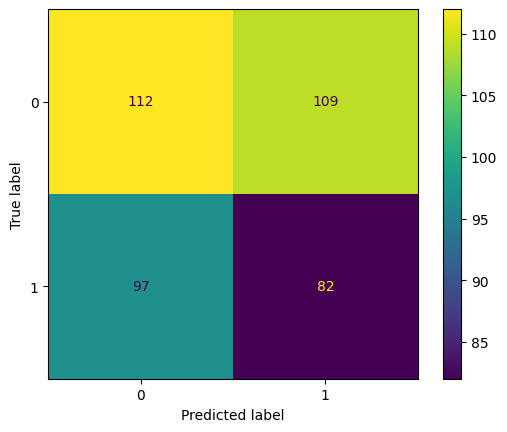

In [708]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

```Base Learner: Logistic Regression```

In [709]:
ada_clf = AdaBoostClassifier(LogisticRegression(random_state=32), n_estimators=2000, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(random_state=32),
                   learning_rate=1, n_estimators=2000)

In [710]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [711]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4519774011299435
recall = 0.44692737430167595
fscore = 0.44943820224719094
accuracy-score = 0.51


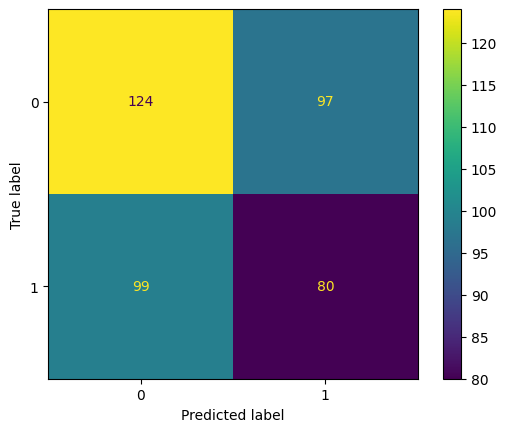

In [712]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

```Base Learner: SVC```

In [713]:
ada_clf = AdaBoostClassifier(SVC(probability=True, kernel = 'linear'), n_estimators=50, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1)

In [714]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [715]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.43023255813953487
recall = 0.4134078212290503
fscore = 0.42165242165242167
accuracy-score = 0.4925


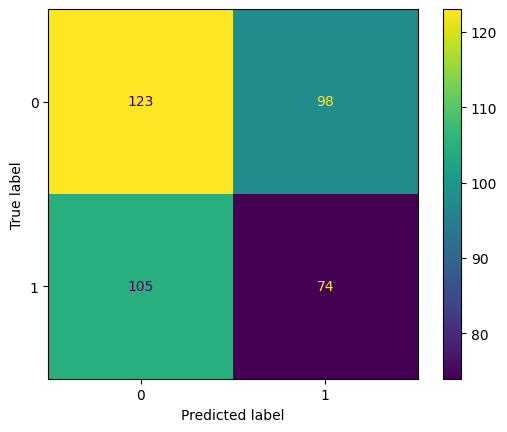

In [716]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# display
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Adaboost with Hyperparameter Tuning

``` Base Learner: Decision Stumps```

In [717]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,random_state = 32))

parameters = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,0.5,1]}

grid_search = GridSearchCV(ada_clf, parameters,verbose=3,scoring='f1',n_jobs=-1)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=32)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [718]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 250}


In [719]:
# Generate predictions with the best model
Y_pred = best_rf.predict(X_test)

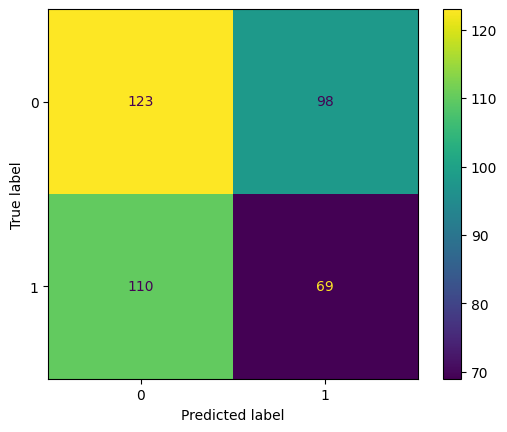

In [720]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [721]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.41317365269461076
recall = 0.3854748603351955
fscore = 0.3988439306358382
accuracy-score = 0.485


## Best accuracy scores:
1. Random Forest: Best accuracy-score = 0.485 #fast
2. Adaboost: Best accuracy-score = 0.485 #slow

# Task 2: Supermarket sales
The supermarket sales dataset has sales data for a supermarket with three branches. This document describes the data fields.

You have two tasks for this dataset.

1. Build two classifiers to predict Gender, one using a decision tree and one using a random forest. Use a suitable evaluation metric to compare the performance of the classifiers.

2. Build two models to predict Rating, one using linear regression and one using a decision tree regressor. Use a suitable evaluation metric to compare the performance of the models.

## Preprocessing

In [596]:
df1 = pd.read_csv("/content/supermarket-sales-data.csv")

In [597]:
df1.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [598]:
for i in range(0,1000):
  df1['InvoiceID'][i] = i+1

<ipython-input-598-9586bcfef013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceID'][i] = i+1


In [599]:
df1['InvoiceID'][55]

56

In [600]:
df1['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [601]:
df1['Branch'].replace(['A','B','C'],[0,1,2],inplace=True)

In [602]:
df1['CustomerType'].unique()

array(['Member', 'Normal'], dtype=object)

In [603]:
df1['CustomerType'].replace(['Member','Normal'],[0,1],inplace=True)

In [604]:
df1['CustomerType']

0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    0
998    1
999    0
Name: CustomerType, Length: 1000, dtype: int64

In [605]:
df1['ProductType'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [606]:
df1['ProductType'].replace(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'],[0,1,2,3,4,5],inplace=True)

In [607]:
df1['ProductType']

0      0
1      1
2      2
3      0
4      3
      ..
995    0
996    2
997    4
998    2
999    5
Name: ProductType, Length: 1000, dtype: int64

In [608]:
df1['PaymentType'].unique()

array(['UPI', 'Cash', 'Credit card'], dtype=object)

In [609]:
df1['PaymentType'].replace(['UPI', 'Cash', 'Credit card'],[0,1,2],inplace=True)

In [610]:
df1['PaymentType']

0      0
1      1
2      2
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    1
Name: PaymentType, Length: 1000, dtype: int64

In [611]:
df1.head(-1)

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,1,0,0,Female,0,74.69,7,26.1415,548.9715,0,9.1
1,2,2,1,Female,1,15.28,5,3.8200,80.2200,1,9.6
2,3,0,1,Male,2,46.33,7,16.2155,340.5255,2,7.4
3,4,0,0,Male,0,58.22,8,23.2880,489.0480,0,8.4
4,5,0,1,Male,3,86.31,7,30.2085,634.3785,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...
994,995,2,0,Female,1,60.95,1,3.0475,63.9975,0,5.9
995,996,2,1,Male,0,40.35,1,2.0175,42.3675,0,6.2
996,997,1,1,Female,2,97.38,10,48.6900,1022.4900,0,4.4
997,998,0,0,Male,4,31.84,1,1.5920,33.4320,1,7.7


In [612]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [613]:
df1['Gender'].replace(['Female', 'Male'],[1,0],inplace=True)

In [614]:
df1['Gender'][:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [615]:
X = df1.drop('Gender', axis = 1)
y = df1['Gender']
X[:5], y[:5]

(  InvoiceID  Branch  CustomerType  ProductType  UnitPrice  Quantity      Tax  \
 0         1       0             0            0      74.69         7  26.1415   
 1         2       2             1            1      15.28         5   3.8200   
 2         3       0             1            2      46.33         7  16.2155   
 3         4       0             0            0      58.22         8  23.2880   
 4         5       0             1            3      86.31         7  30.2085   
 
       Total  PaymentType  Rating  
 0  548.9715            0     9.1  
 1   80.2200            1     9.6  
 2  340.5255            2     7.4  
 3  489.0480            0     8.4  
 4  634.3785            0     5.3  ,
 0    1
 1    1
 2    0
 3    0
 4    0
 Name: Gender, dtype: int64)

In [631]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)
X_train = X_train.astype('int')
X_test = X_test.astype('int')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## Predicting Gender

### Decision Trees

In [632]:
dt_clf = DecisionTreeClassifier()

In [634]:
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [636]:
Y_pred = dt_clf.predict(X_test)

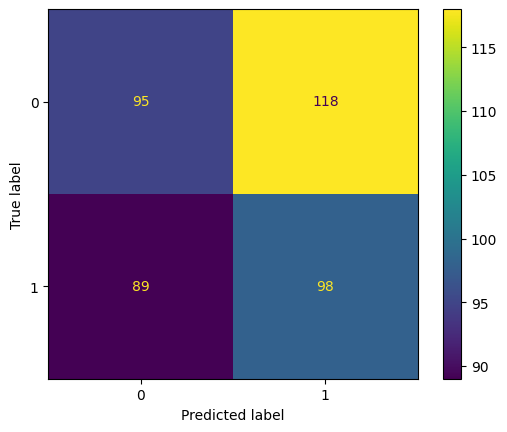

In [639]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [640]:
l = ['precision', 'recall', 'fscore', 'accuracy']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4537037037037037
recall = 0.5240641711229946
fscore = 0.4863523573200993
accuracy = 0.4825


### Random Forest

In [641]:
rf_clf = RandomForestClassifier()

In [643]:
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [645]:
Y_pred = rf_clf.predict(X_test)

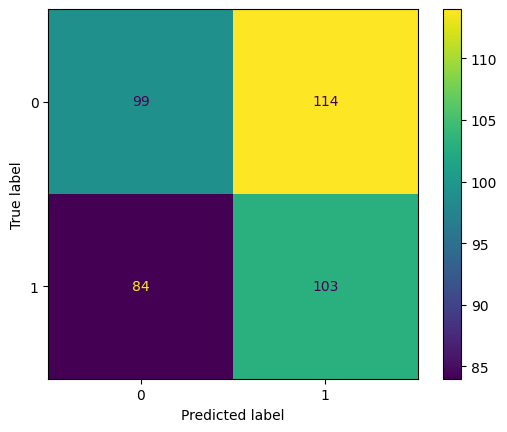

In [646]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [647]:
l = ['precision', 'recall', 'fscore', 'accuracy']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.47465437788018433
recall = 0.5508021390374331
fscore = 0.5099009900990099
accuracy = 0.505


Random Forest Classifier performs better than a Decision Tree Classifier

## Predicting Rating

In [672]:
X = df1.drop('Rating', axis = 1)
y = df1['Rating']
X[:5], y[:5]

(  InvoiceID  Branch  CustomerType  Gender  ProductType  UnitPrice  Quantity  \
 0         1       0             0       1            0      74.69         7   
 1         2       2             1       1            1      15.28         5   
 2         3       0             1       0            2      46.33         7   
 3         4       0             0       0            0      58.22         8   
 4         5       0             1       0            3      86.31         7   
 
        Tax     Total  PaymentType  
 0  26.1415  548.9715            0  
 1   3.8200   80.2200            1  
 2  16.2155  340.5255            2  
 3  23.2880  489.0480            0  
 4  30.2085  634.3785            0  ,
 0    9.1
 1    9.6
 2    7.4
 3    8.4
 4    5.3
 Name: Rating, dtype: float64)

In [673]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)
X_train = X_train.astype('int')
X_test = X_test.astype('int')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

### Decision Tree Regressor

In [674]:
dtr_clf = DecisionTreeRegressor()

In [675]:
dtr_clf.fit(X_train, Y_train)

DecisionTreeRegressor()

In [676]:
Y_pred = dtr_clf.predict(X_test)

In [677]:
rmse = mean_squared_error(Y_test, Y_pred)
print('rmse = ', rmse)

rmse =  5.675


### Linear regression

In [667]:
lr_clf = LinearRegression()

In [ ]:
lr_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred = lr_clf.predict(X_test)

In [671]:
rmse = mean_squared_error(Y_test, Y_pred)
print('rmse = ', rmse)

rmse =  5.8925


Decision Tree Regressor is better than Linear Regressor